## Principles and Applications of Data Science
## Spring 2021
## Project Code

### Name: 吳承岳 蘇新允
### Student ID Number: 109598085 109598088

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import folium # 匯入 folium 套件

In [2]:
accident_108 = pd.read_csv( '108年臺北市道路交通事故斑點圖.csv', header=0, names=['Date', 'Type', 'Address', 'X', 'Y'] , encoding = 'big5hkscs') # X : 經度  Y : 緯度
accident_109 = pd.read_csv( '109年臺北市道路交通事故斑點圖.csv', header=0, names=['Date', 'Type', 'Address', 'X', 'Y'] , encoding = 'big5hkscs') # X : 經度  Y : 緯度
accident = accident_108.append(accident_109)
accident = accident.sort_values(by=['Date'],ascending=True)
# print ( len(accident) )


In [3]:
# 建立地圖與設定位置
fmap = folium.Map(location=[25.074362, 121.525266], zoom_start=11)

# for i in range(len(accident_108)):
#     # print( shi_shi_108.iloc[0]['X'] )
#     fmap.add_child(folium.Marker(location=[accident_108.iloc[i]['Y'], accident_108.iloc[i]['X']], popup='Skytree'))
#     print( i )
fmap

In [4]:
shi_shi = accident
# print( road_1_108.sample(20) )

# 西藏路東往南左轉西園路
# 25.028821, 121.495564 左上
# 25.028760, 121.495747 右上
# 25.028637, 121.495491 左下
# 25.028604, 121.495656 右下

# 新左上 25.028881788090253, 121.49538990255243
# 新右上 25.029057, 121.496342
# 新右下 25.02855355291526, 121.49630027445843
# 新左下 25.028593937918814, 121.49540507541674
# print( len(shi_shi) )

shi_shi = shi_shi[(shi_shi['X'] >= 121.495389)]

shi_shi = shi_shi[(shi_shi['X'] <= 121.496342)]

shi_shi = shi_shi[(shi_shi['Y'] >= 25.028553)]

shi_shi = shi_shi[(shi_shi['Y'] <= 25.029057)]

# print( len(shi_shi) )

# shi_shi.head(20)
# road_1_108 = road_1_108[(road_1_108['X'] >= 121.495491) & (road_1_108['X'] <= 121.495747) & (road_1_108['Y'] >= 25.028604) & (road_1_108['Y'] <= 25.028821)]
# print(len(road_1_108))

In [5]:
# 建立地圖與設定位置
fmap = folium.Map(location=[25.028712, 121.495619], zoom_start=18)
for i in range(len(shi_shi)):
    folium.CircleMarker(location=[shi_shi.iloc[i]['Y'], shi_shi.iloc[i]['X']], radius=2, weight=0, color="#007849").add_to(fmap)
    fmap.add_child(folium.Marker(location=[shi_shi.iloc[i]['Y'], shi_shi.iloc[i]['X']], popup='Skytree'))
#     print( i )

folium.ColorLine([
    [25.029057, 121.49538990255243],[25.029057, 121.496342],[25.02855355291526, 121.496342],
    [25.02855355291526, 121.49538990255243],[25.029057, 121.49538990255243]],
    [0, 1, 2, 3],
    colormap = ['red', 'blue', 'green', 'orange'],
    weight = 5
).add_to(fmap)

import io
from PIL import Image

img_data = fmap._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('shi_shi_108_to_109_dot.png')

fmap  # 在notebook中顯示地圖

In [6]:
# 大業路口 左轉 承德路
# 25.121249, 121.499503 左上
# 25.121159, 121.499842 右上
# 25.120972, 121.499530 左下
# 25.120866, 121.499858 右下

#新左上 25.121409697682772, 121.49933054457061
#新右上 25.12140010054062, 121.50002121930567
#新左下 25.120876350812324, 121.49934982005911
#新右下 25.120893522970167, 121.50019191402937
da_chen_108 = accident.sort_values(by=['Date'],ascending=True)

# print( len(da_chen_108) )

da_chen_108 = da_chen_108[(da_chen_108['X'] >= 121.49933054457061)]

da_chen_108 = da_chen_108[(da_chen_108['X'] <= 121.50002121930567)]

da_chen_108 = da_chen_108[(da_chen_108['Y'] >= 25.120876350812324)]

da_chen_108 = da_chen_108[(da_chen_108['Y'] <= 25.121409697682772)]

# print( len(da_chen_108) )
# da_chen_108

In [7]:
# 建立地圖與設定位置
fmap = folium.Map(location=[25.121133, 121.499659], zoom_start=18)
for i in range(len(da_chen_108)):
    folium.CircleMarker(location=[da_chen_108.iloc[i]['Y'], da_chen_108.iloc[i]['X']], radius=2, weight=0, color="#007849").add_to(fmap)
    fmap.add_child(folium.Marker(location=[da_chen_108.iloc[i]['Y'], da_chen_108.iloc[i]['X']], popup='Skytree'))
#     print( i )

folium.ColorLine([
    [25.121409697682772, 121.49933054457061],[25.12140010054062, 121.50002121930567],[25.120893522970167, 121.50019191402937],
    [25.120876350812324, 121.49934982005911],[25.121409697682772, 121.49933054457061]],
    [0, 1, 2, 3],
    colormap = ['red', 'blue', 'green', 'orange'],
    weight = 5
).add_to(fmap)

import io
from PIL import Image

img_data = fmap._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('da_chen_108_108_to_109_dot.png')

fmap  # 在notebook中顯示地圖

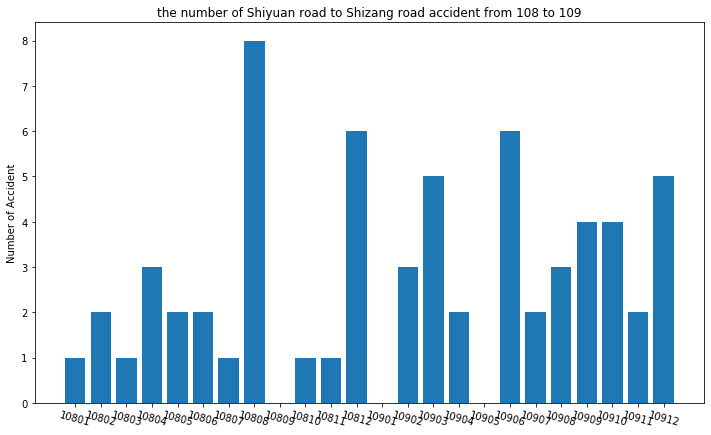

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# stations = shi_shi['Date'].str.contains("2019",na = False)
# shi_shi['Date'].str.contains("2019")
shi_shi_per_month = []

shi_shi_per_month.append( len(shi_shi[(shi_shi['Date'] < '2019-02')])  )
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-03') & (shi_shi['Date'] > '2019-02')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-04') & (shi_shi['Date'] > '2019-03')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-05') & (shi_shi['Date'] > '2019-04')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-06') & (shi_shi['Date'] > '2019-05')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-07') & (shi_shi['Date'] > '2019-06')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-08') & (shi_shi['Date'] > '2019-07')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-09') & (shi_shi['Date'] > '2019-08')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-10') & (shi_shi['Date'] > '2019-09')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-11') & (shi_shi['Date'] > '2019-10')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2019-12') & (shi_shi['Date'] > '2019-11')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-01') & (shi_shi['Date'] > '2019-12')]))

shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-02') & (shi_shi['Date'] > '2020-01')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-03') & (shi_shi['Date'] > '2020-02')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-04') & (shi_shi['Date'] > '2020-03')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-05') & (shi_shi['Date'] > '2020-04')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-06') & (shi_shi['Date'] > '2020-05')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-07') & (shi_shi['Date'] > '2020-06')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-08') & (shi_shi['Date'] > '2020-07')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-09') & (shi_shi['Date'] > '2020-08')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-10') & (shi_shi['Date'] > '2020-09')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-11') & (shi_shi['Date'] > '2020-10')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] < '2020-12') & (shi_shi['Date'] > '2020-11')]))
shi_shi_per_month.append(len(shi_shi[(shi_shi['Date'] > '2020-12')]))
shi_shi_per_month

da_chen_per_month = []

da_chen_per_month.append( len(da_chen_108[(da_chen_108['Date'] < '2019-02')])  )
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-03') & (da_chen_108['Date'] > '2019-02')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-04') & (da_chen_108['Date'] > '2019-03')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-05') & (da_chen_108['Date'] > '2019-04')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-06') & (da_chen_108['Date'] > '2019-05')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-07') & (da_chen_108['Date'] > '2019-06')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-08') & (da_chen_108['Date'] > '2019-07')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-09') & (da_chen_108['Date'] > '2019-08')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-10') & (da_chen_108['Date'] > '2019-09')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-11') & (da_chen_108['Date'] > '2019-10')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2019-12') & (da_chen_108['Date'] > '2019-11')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-01') & (da_chen_108['Date'] > '2019-12')]))

da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-02') & (da_chen_108['Date'] > '2020-01')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-03') & (da_chen_108['Date'] > '2020-02')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-04') & (da_chen_108['Date'] > '2020-03')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-05') & (da_chen_108['Date'] > '2020-04')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-06') & (da_chen_108['Date'] > '2020-05')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-07') & (da_chen_108['Date'] > '2020-06')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-08') & (da_chen_108['Date'] > '2020-07')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-09') & (da_chen_108['Date'] > '2020-08')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-10') & (da_chen_108['Date'] > '2020-09')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-11') & (da_chen_108['Date'] > '2020-10')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] < '2020-12') & (da_chen_108['Date'] > '2020-11')]))
da_chen_per_month.append(len(da_chen_108[(da_chen_108['Date'] > '2020-12')]))
da_chen_per_month
# passenger_num = data_enter[i]['Passengers number'] / 1000000

months = [10801,10802,10803,10804,10805,10806,10807,10808,10809,10810,10811,10812,10901,10902,10903,10904,10905,10906,10907,10908,10909,10910,10911,10912]
x = np.arange(len(months))
plt.figure(figsize=(12,7))
plt.bar(x, shi_shi_per_month)
plt.xticks(x, months,rotation = 345)
# plt.xlabel('Road')
plt.ylabel('Number of Accident')
plt.title('the number of Shiyuan road to Shizang road accident from 108 to 109')

plt.show()

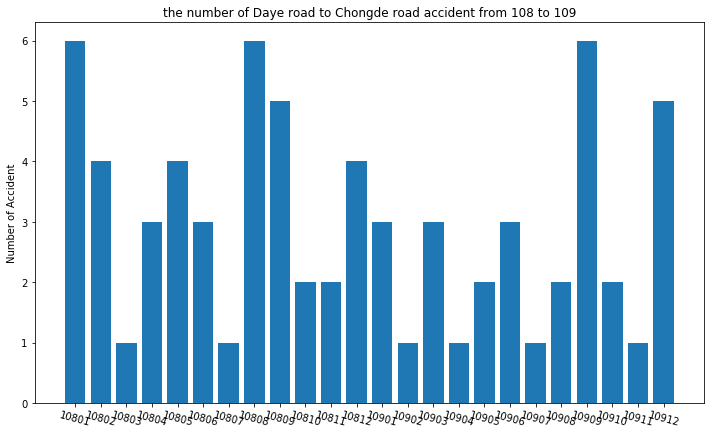

In [9]:
plt.figure(figsize=(12,7))
plt.bar(x, da_chen_per_month)
plt.xticks(x, months,rotation = 345)
# plt.xlabel('Road')
plt.ylabel('Number of Accident')
plt.title('the number of Daye road to Chongde road accident from 108 to 109')

plt.show()

In [10]:
ta_cheng = accident

# 鄭州路 左轉 塔城街
# 25.050402202655178, 121.51032764142667 左上
# 25.050336517496575, 121.51093196028633 右上
# 25.049946977896965, 121.51025339100488 左下
# 25.049863270512727, 121.51089452779236 右下

ta_cheng = ta_cheng[(ta_cheng['X'] >= 121.51025339100488)]
ta_cheng = ta_cheng[(ta_cheng['X'] <= 121.51093196028633)]
ta_cheng = ta_cheng[(ta_cheng['Y'] >= 25.049863270512727)]
ta_cheng = ta_cheng[(ta_cheng['Y'] <= 25.050402202655178)]

In [11]:
# 建立地圖與設定位置
fmap = folium.Map(location=[25.050168, 121.510596], zoom_start=18)
for i in range(len(ta_cheng)):
    folium.CircleMarker(location=[ta_cheng.iloc[i]['Y'], ta_cheng.iloc[i]['X']], radius=2, weight=0, color="#007849").add_to(fmap)
    fmap.add_child(folium.Marker(location=[ta_cheng.iloc[i]['Y'], ta_cheng.iloc[i]['X']], popup='Skytree'))
#     print( i )

folium.ColorLine([
    [25.050402202655178, 121.51025339100488],[25.050402202655178, 121.51093196028633],[25.049863270512727, 121.51093196028633],
    [25.049863270512727, 121.51025339100488],[25.050402202655178, 121.51025339100488]],
    [0, 1, 2, 3],
    colormap = ['red', 'blue', 'green', 'orange'],
    weight = 5
).add_to(fmap)

import io
from PIL import Image

img_data = fmap._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('ta_cheng_108_to_109_dot.png')

fmap  # 在notebook中顯示地圖

In [12]:
ta_cheng_per_month = []

ta_cheng_per_month.append( len(ta_cheng[(ta_cheng['Date'] < '2019-02')])  )
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-03') & (ta_cheng['Date'] > '2019-02')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-04') & (ta_cheng['Date'] > '2019-03')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-05') & (ta_cheng['Date'] > '2019-04')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-06') & (ta_cheng['Date'] > '2019-05')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-07') & (ta_cheng['Date'] > '2019-06')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-08') & (ta_cheng['Date'] > '2019-07')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-09') & (ta_cheng['Date'] > '2019-08')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-10') & (ta_cheng['Date'] > '2019-09')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-11') & (ta_cheng['Date'] > '2019-10')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2019-12') & (ta_cheng['Date'] > '2019-11')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-01') & (ta_cheng['Date'] > '2019-12')]))

ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-02') & (ta_cheng['Date'] > '2020-01')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-03') & (ta_cheng['Date'] > '2020-02')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-04') & (ta_cheng['Date'] > '2020-03')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-05') & (ta_cheng['Date'] > '2020-04')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-06') & (ta_cheng['Date'] > '2020-05')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-07') & (ta_cheng['Date'] > '2020-06')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-08') & (ta_cheng['Date'] > '2020-07')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-09') & (ta_cheng['Date'] > '2020-08')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-10') & (ta_cheng['Date'] > '2020-09')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-11') & (ta_cheng['Date'] > '2020-10')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] < '2020-12') & (ta_cheng['Date'] > '2020-11')]))
ta_cheng_per_month.append(len(ta_cheng[(ta_cheng['Date'] > '2020-12')]))
# ta_cheng_per_month

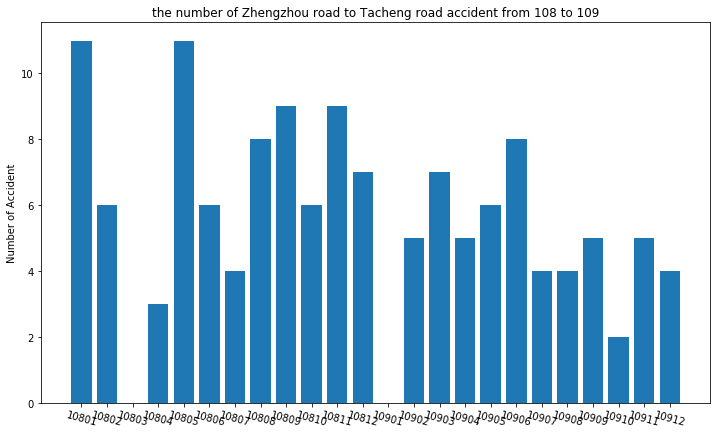

In [13]:
plt.figure(figsize=(12,7))
plt.bar(x, ta_cheng_per_month)
plt.xticks(x, months,rotation = 345)
# plt.xlabel('Road')
plt.ylabel('Number of Accident')
plt.title('the number of Zhengzhou road to Tacheng road accident from 108 to 109')

plt.show()